# 第9回 モンテカルロ法2

In [1]:
import numpy as np
#from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

**注意**
stats.qmcモジュールはScipyライブラリのバージョン1.7.0以上で使うことができるが、現状Google ColabにインストールされているScipyライブラリのバージョンは1.4.1である。そこで、新しいバージョンのScipyライブラリをGoogle Colabにインストールしてから、stas.qmcを使う必要がある。

In [2]:
## Scipyバージョン1.7.3のインストール
!pip install scipy==1.7.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
from scipy.stats import norm
## scipy.stasからqmcモジュールをインポート
from scipy.stats import qmc

## 乱数

モンテカルロ法では期待値を計算したい確率変数の無作為標本が必要となる。
これらの標本を計算機上で乱数を発生させることによって得たいのだが、純粋な意味での乱数を計算機上で発生させることは不可能である。
通常は計算機上で疑似的な乱数（**擬似乱数**）を発生させる。
あとで述べるように、任意の分布にしたがう乱数列は一様乱数列から生成できるので、一様乱数列をどのように発生させるかが問題となる。
一様乱数列の生成法として、
メルセンヌ・ツイスタ(Mersenne Twister)（松本・西村(1998)）が有名である。
PythonのNumpyライブラリでは、Permuted congruential generator (PCG)という生成法がデフォルトで使われる。

任意の分布にしたがう乱数列を得たい場合には、たとえばつぎのようにする。
まず、一般論として確率変数が$X$が一様分布$U[0,1]^d$にしたがうとき、
確率変数$F^{-1}(X)$の分布関数は$F$となる。
実際、

$$
 P(F^{-1}(X) < x) = P(X < F(x)) = F(x)
$$

である。

よって、一様乱数列と分布関数の逆関数$F^{-1}$から任意の分布にしたが
う乱数列を発生させることができる。
ただし，$F^{-1}$が陽的に求まらない場合には（たとえば正規分布）何らかの近似法が必要となる。
Numpyでは各種分布にしたがう乱数列を生成するメソッド（関数）が用意されている。



## 準モンテカルロ法

ファイナンスの多くの問題は確率変数$X_1, X_2, \dots, X_d$の期待値
$E[g(X_1, X_2, \dots, X_d)]$（$g$は適当な関数）に帰着される。
正規分布なども一様分布から変換されることを考えれば、結局
$E[f(U_1, U_2, \dots, U_d)]$（$g$は適当な関数，$U_1, \dots, U_d$は互いに独立な一様分布にしたがう確率変数）という形の期待値の評価がしたいことになる。

$$
E[f(U_1, \dots, U_d)] = \int_{[0,1)^d}f({x})d{x}
$$

であるから、結局右辺の積分値を計算したいことになる。

2次元の一様分布にしたがう乱数を100個生成するとつぎのようになる。

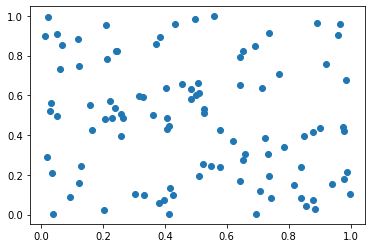

In [4]:
urnd1 = np.random.uniform(size=100)
urnd2 = np.random.uniform(size=100)
plt.scatter(urnd1, urnd2)
plt.show()

するとランダムであるがゆえに、場合によっては乱数がある部分に固まり、「一様」ではなくなってしまう。

そこで、**低食い違い列**（超一様点列、low-discrepancy列）と呼ばれる、**確定的**な$[0,1)^d$上の数列を用いることを考える（$d$は乱数の次元）。低食い違い列は非常に一様性の高い数列である。

低食い違い列$x_1, \dots, x_n \in [0, 1)^d$を用いて

$$
\int_{[0,1)^d}f(x)dx
 \approx
\frac{1}{n}\sum_{i=1}^{n}f(x_i)
$$

と近似する方法を**準モンテカルロ法**（Quasi-Monte Carlo Method, QMC）とよぶ。

モンテカルロ法の場合、乱数の数$n$に対して誤差のオーダーは $O(1/\sqrt{n})$ であったが、準モンテカルロ法の場合はおよそ $O(1/n）$ となる。

低食い違い列には、Faure列、Halton列、Sobol'列などいくつか種類がある。

PythonではScipyライブラリのstats.qmcモジュール
（ https://docs.scipy.org/doc/scipy/reference/stats.qmc.html ）
により低食い違い列を生成することができる。



2次元のSobol'列を$2^7$個生成する。

In [5]:
sobol_sampler = qmc.Sobol(d=2, scramble=False) #scramble=Trueはランダム化
sobol_seq = sobol_sampler.random_base2(m=7)

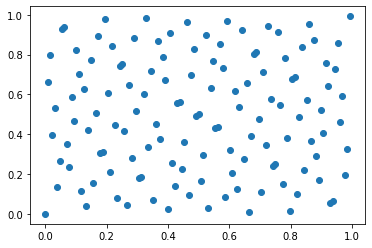

In [6]:
plt.scatter(sobol_seq[:,0], sobol_seq[:,1])
plt.show()

低食い違い列を生成する際には次元を明示的に指定する必要がある。
たとえば$2$次元の一様（擬似）乱数を$N$個生成するときは、互いに独立な
$N$個の一様乱数列

$$
U_1, U_2, \dots, U_N
$$

と

$$
U'_1, U'_2, \dots, U'_N
$$

をそれぞれ生成し

$$
(U_1, U'_1), (U_2, U'_2), \dots, (U_N, U'_N)
$$

とすればよい。
しかし、**低食い違い列では生成方法が次元に依存する**ため、同じようにはできない。

## 準モンテカルロ法によるオプション価格近似

Sobol'列を用いてヨーロピアンコールオプションの価格を近似してみる。
Scipyライブラリのstats.qmc.MultivariateNormalQMCモジュール
（https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.qmc.MultivariateNormalQMC.html#scipy.stats.qmc.MultivariateNormalQMC ）
により、正規分布に従う低食い違い列を生成することができる。デフォルトでSobol'列から生成された正規分布にしたがう低食い違い列が生成される。
また、qmcモジュールではデフォルトでランダム化された準モンテカルロ法（Randomize QMC, RQMC）を実行するための点列が生成されるので、実行するたびに結果が異なる。

In [7]:
def QMCBScall(N, S0, K, T, r, sigma):
  normal_sobol = qmc.MultivariateNormalQMC(mean=0)
  seq = normal_sobol.random(N)
  S = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * seq) 
  X = np.exp(-r * T) * np.maximum(S - K, 0) 
  return X.mean()

In [8]:
QMCBScall(2**17, 100, 99, 1, 0.01, 0.2)

8.918560059430684

真の値への収束の様子を見る。

In [9]:
def BScall(S, K, T, r, sigma):
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T)/(sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  C = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
  return C

def MCBScall(N, S0, K, T, r, sigma):
  np.random.seed(123)
  rnd = np.random.standard_normal(N)  
  S = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * rnd) 
  X = np.exp(-r * T) * np.maximum(S - K, 0) 
  return X.mean()

標本数を $1000 \times i$（$i=1, 2, \dots, N$)として、価格のグラフを描く。

/usr/local/lib/python3.7/dist-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


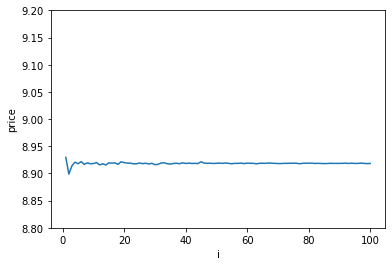

In [10]:
# QMCによるオプション価格近似
N = 100
price = np.zeros(N)
for i in range(N):
   price[i] = QMCBScall(1000 * (i + 1), 100, 99, 1, 0.01, 0.2)

# グラフ
x = np.arange(1, N+1)
plt.ylim(8.8, 9.2)
plt.xlabel('i')
plt.ylabel('price')
plt.plot(x, price)
plt.show()

モンテカルロ法の場合

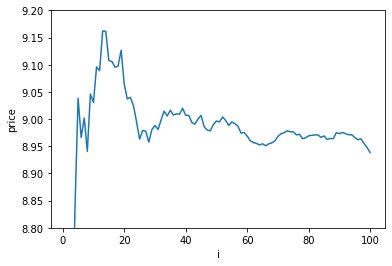

In [11]:
N = 100
price2 = np.zeros(N)
for i in range(N):
   price2[i] = MCBScall(1000 * (i + 1), 100, 99, 1, 0.01, 0.2)

# グラフ
x = np.arange(1, N+1)
plt.ylim(8.8, 9.2)
plt.xlabel('i')
plt.ylabel('price')
plt.plot(x, price2)
plt.show()

誤差のオーダーをグラフで見る。オレンジ色の波線は傾きが$-1$の直線。

/usr/local/lib/python3.7/dist-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


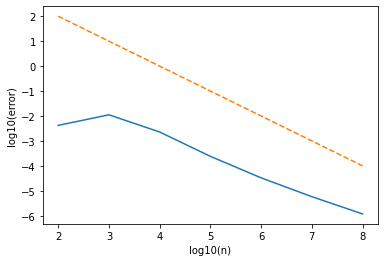

In [12]:
#誤差の計算
S0 = 100
K = 99
T = 1
r = 0.01
sigma = 0.2

N = 9
error = np.zeros(N - 2)
for i in range(2, N):
  error[i - 2] = np.abs(QMCBScall(10**i, S0, K, T, r, sigma) - BScall(S0, K, T, r, sigma))

#グラフの描画
log_error = np.log10(error)
x = np.arange(2, 9)
y = -x + 4
plt.xlabel('log10(n)')
plt.ylabel('log10(error)')
plt.plot(x, log_error)
plt.plot(x, y, ls='--')
plt.show()

株価過程がリスク中立確率のもとで対数正規過程

$$
dS(t) = rS(t)dt + \sigma S(t) dW(t) 
$$

すなわち、

$$
S(t) = S_0 \exp\left\{\left(r - \frac{\sigma^2}{2}\right)t + \sigma W(t)\right\}
$$

にしたがうとき、

ノックアウトオプション

$$(S(T) - K)^+ I\left\{\max_{0\leq t \leq T}S(t) < B\right\}
$$

の価格を準モンテカルロ法により求めてみる。


$\max_{0 \leq t \leq T}S(t)$を計算するためには、$[0, T]$を$M$分割して

$$
(S(t_0), S(t_1), \dots, S(t_M))
$$

のサンプルを生成する必要がある（$t_0=0$）。ここで$t_i = iT/M$である。

$$
S(t) = S(0)\exp\left\{\left(r - \frac{\sigma^2}{2}\right)t + \sigma W(t)\right\}
$$

であるから、結局

$$
	(W(t_1), W(t_2), \dots, W(t_M))
$$

のサンプルを生成すればよい。
$W(t + \Delta t) - W(t) \sim N(0,\Delta t)$で、
ブラウン運動の増分は独立、すなわち$W(t_{i+2}) - W(t_{i+1})$と
$W(t_{i+1}) - W(t_i)$は独立だから、
$(Z_1, Z_2, \dots,Z_M)$
を各成分が独立な$M$次元標準正規分布にしたがう確率変数としたとき

\begin{align*}
	W(t_1) &= W(t_0) + \sqrt{t_1}Z_1 = \sqrt{t_1}Z_1\\
	W(t_2) &= W(t_1) + \sqrt{t_2 - t_1}Z_2 = \sqrt{t_1}Z_1 +
	\sqrt{t_2 - t_1}Z_2\\
	\vdots\\
	W(t_{M-1}) &= W(t_{M-2}) + \sqrt{t_{M-1} - t_{M-2}}Z_{d-1} =
	\sum_{i=1}^{M-1}\sqrt{t_i-t_{i-1}}Z_i\\
	W(t_M) &= W(t_{M-1}) + \sqrt{t_{M} - t_{M-1}}Z_M =
	\sum_{i=1}^{M}\sqrt{t_i-t_{i-1}}Z_i
\end{align*}

となる。よって，

$$
	\begin{pmatrix}
	 W(t_1)\\
	 W(t_2)\\
	 \vdots\\
	 W(t_{M-1})\\
	 W(t_M)
	\end{pmatrix}
 =
 \begin{pmatrix}
  \sqrt{t_1}& 0 & \cdots & 0 & 0\\
  \sqrt{t_1}& \sqrt{t_2 - t_1} & \cdots & 0 & 0\\
  \vdots& \vdots & \ddots & \vdots & \vdots \\
  \sqrt{t_1} & \sqrt{t_2 - t_1} & \cdots & \sqrt{t_{M-1} - t_{M-2}} &
  0\\
  \sqrt{t_1} & \sqrt{t_2 - t_1} & \cdots & \sqrt{t_{M-1} - t_{M-2}} &
  \sqrt{t_{M} - t_{M-1}}
 \end{pmatrix}
\begin{pmatrix}
	 Z_1\\
	 Z_2\\
	 \vdots\\
	 Z_{M-1}\\
	 Z_M
	\end{pmatrix}
$$

とすればよい。



In [13]:
T = 1 # 最終時刻
M = 250 # [0,T] 区間の分割数
delta = T/M # 1区間の長さ
N = 2**17 # サンプルをN個生成する

S0 = 100 # BSモデルのパラメータ
K = 99
r = 0.01
sigma = 0.2
B = 120 # バリアの値

A = np.tril(np.sqrt(delta) * np.ones((M, M))) # ブラウン運動のパスを生成する準備

normal_sobol = qmc.MultivariateNormalQMC(mean=np.zeros(M)) # M次元Sobol'列を生成
seq = normal_sobol.random(N)

t = np.arange(1, M + 1) / M * T # 株価パスを生成する時刻

payoff = np.zeros(N)

for i in range(N):
  S = np.zeros(M+1)
  S[0] = S0

  Z = seq[i, :]
  W = np.dot(A, Z) # ブラウン運動のパス

  S[1:] = S0 * np.exp((r - 0.5 * sigma**2) * t + sigma * W)  # 株価のパス
  payoff[i] = np.maximum(S[M] - K, 0) * (np.max(S) < B)  # 支払いの計算

price = np.exp(-r * T) * payoff.mean()
print(price)

1.4561594693636013


## 確率ボラティリティモデルにおけるオプション価格付け

Black-Scholeモデルは市場データと整合的でないことはよく知られている。例えば、BSモデルはボラティリティ・スマイルを説明できない。そこで、BSモデルの拡張として、ボラティリティが確率的に変動するモデルが考案されている。なかでも、つぎのHestonモデルは解析解（かなり複雑だが）があることもあり、よく用いられる。

$$ \tag{1}
\begin{cases}
 dS(t)  = r S(t) dt +  S(t) \sqrt{Y(t)}dW_1(t)\\
 dY(t)  = k(\theta - Y(t)) dt + \beta \sqrt{Y(t)} dW_2(t)
\end{cases}
$$

ここで、$W_1, W_2$は相関を持つブラウン運動で

$$
dW_1 \cdot dW_2 = \rho dt \tag{2}
$$

を満たす。(2)は

$$ \tag{3}
E\left[(W_1(t + \Delta t) - W_1(t))(W_2(t + \Delta t) - W_2(t))\right] = \rho
 \Delta t
$$

を意味する。(2)または(3)の相関を持つブラウン運動は2次元ブラウン運動 $(W'_1, W'_2)$ （$W'_1, W'_2$は独立）から

$$
W_1 = W'_1,\
W_2 = \rho W'_1 + \sqrt{1 - \rho^2}W'_2
$$

により生成できる。

この$Y$がしたがう確率微分方程式は平方根過程（Feller過程、CIR過程）と呼ば
れるものであり、定数$k, \theta, \beta$に関する適当な条件のもとで非負であり、平均回帰性をもつという特徴がある。

Hestonモデル(1)のもとでヨーロピアンコールオプションの価格、すなわち

$$
E[e^{-rT}(S(T) - K)^+]
$$

をモンテカルロ法により計算する。

（1）を離散近似すると

$$\tag{4}
S(t_i + \Delta t) = S(t_i) + rS(t_i)\Delta t + S(t_i)\sqrt{Y(t_i)^+}(W_{1}(t_i + \Delta t) - W_1(t_i))
$$

$$\tag{5}
Y(t_i + \Delta t) = Y(t_i) + k(\theta - Y(t_i))\Delta t + \beta \sqrt{Y(t_i)^+}(W_{2}(t_i + \Delta t) - W_{2}(t_i))
$$

となる。
(4)(5)の右辺において$\sqrt{Y(t_i)^+}$となっている点に注意。

$Z_{1,i}, Z_{2,i}$それぞれ標準正規分布（$i=1,2, \dots$）にしたがう独立な確率変数とすれば、

$$
W_{1}(t_i+\Delta t) - W_{1}(t_i) = \sqrt{\Delta t}Z_{1,i},\ W_{2}(t_i + \Delta t) - W_2(t_i) = \sqrt{\Delta t}\left(\rho Z_{1, i} + \sqrt{1 - \rho^2} Z_{2, i}\right)
$$

として

$$
S(t_i + \Delta t) = S(t_i) + rS(t_i)\Delta t + S(t_i)\sqrt{Y(t_i)^+}\sqrt{\Delta t}Z_{1,i}
$$

$$
Y(t_i + \Delta t) = Y(t_i) + k(\theta - Y(t_i))\Delta t + \beta \sqrt{Y(t_i)^+}\sqrt{\Delta t}\left(\rho Z_{1, i} + \sqrt{1 - \rho^2}Z_{2,i}\right)
$$

とする。


In [14]:
T = 1 # 最終時刻
M = 250 # [0,T] 区間の分割数
delta = T/M # 1区間の長さ
N = 10000 # サンプル数

S0 = 100 # Hestonモデルのパラメータ
K = 99
r = 0.01
Y0 = 0.04
k = 0.5
theta = 0.04
beta = 0.3
rho = 0.1

payoff = np.zeros(N)

for j in range(N):
  S = np.zeros(M+1)
  S[0] = S0
  Y = np.zeros(M+1)
  Y[0] = Y0
  
  for i in range(M):
    rnd = np.random.standard_normal(2)
    rnd1 = rnd[0]
    rnd2 = rho * rnd[0] + np.sqrt(1 - rho**2) * rnd[1]
    S[i + 1] = S[i] + S[i] * r * delta + S[i] * np.sqrt(np.maximum(Y[i], 0)) * np.sqrt(delta) * rnd1
    Y[i + 1] = Y[i] + k * (theta - Y[i]) * delta + beta * np.sqrt(np.maximum(Y[i], 0)) * np.sqrt(delta) * rnd2

  payoff[j] = np.exp(-r * T) * np.maximum(S[M] - K, 0)

price = payoff.mean()
print(price)


8.633499474986419
